In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
df = pd.read_csv('./vehicles.csv')

In [3]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


# Describe data

In [4]:
df.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


### Dropping columns not required for predicting target variable

In [5]:
df= df.drop(labels=['id','url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long','region', 'Unnamed: 0', 'posting_date'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         458213 non-null  int64  
 1   year          457163 non-null  float64
 2   manufacturer  439993 non-null  object 
 3   model         453367 non-null  object 
 4   condition     265273 non-null  object 
 5   cylinders     287073 non-null  object 
 6   fuel          454976 non-null  object 
 7   odometer      402910 non-null  float64
 8   title_status  455636 non-null  object 
 9   transmission  455771 non-null  object 
 10  drive         324025 non-null  object 
 11  size          136865 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   317370 non-null  object 
 14  state         458213 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 52.4+ MB


# Removing outliers from price column

In [7]:
sort_price=sorted(df["price"])

In [8]:
q1, q3= np.percentile(sort_price,[10,90])

In [9]:
df=df[(df.price < 27500) & (df.price >= 500 )]
df.shape

(337620, 15)

# Exploring odometer column

In [10]:
df["odometer"].isna().sum()

41840

In [11]:
df["odometer"].value_counts()

150000.0    1243
0.0         1073
200000.0    1049
160000.0    1047
130000.0    1008
            ... 
114914.0       1
601726.0       1
21776.0        1
59095.0        1
57889.0        1
Name: odometer, Length: 89789, dtype: int64

<AxesSubplot:xlabel='odometer', ylabel='price'>

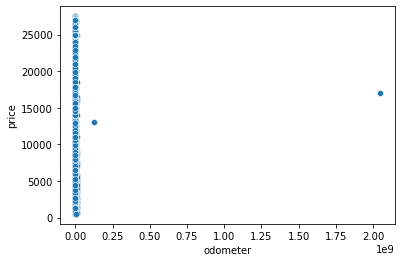

In [15]:
sns.scatterplot(x="odometer", y="price", data=df)

In [16]:
df["odometer"].max()

2043755555.0

In [17]:
df.drop(df[df["odometer"]==2043755555.0].index,inplace=True)

In [18]:
df.drop(df[df["odometer"]==0.0].index,inplace=True)

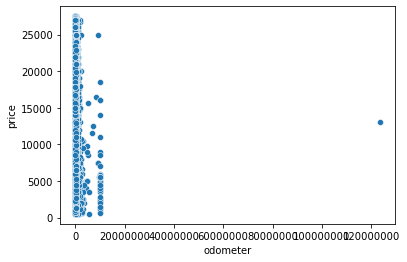

In [19]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

* Removing outliers from odometer column

In [20]:
df["odometer"].isna().sum()

41840

In [21]:
df["odometer"].value_counts()

150000.0    1243
200000.0    1049
160000.0    1047
130000.0    1008
140000.0     973
            ... 
242305.0       1
189856.0       1
155836.0       1
37973.0        1
57889.0        1
Name: odometer, Length: 89787, dtype: int64

In [22]:
df=df[(df.odometer < 3000000)]

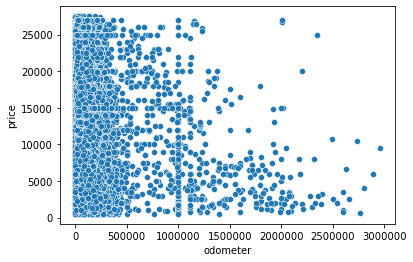

In [23]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [24]:
df["odometer"].isna().sum()

0

# Exploring year column

In [25]:
df["year"].isna().sum()

363

In [26]:
df["year"].min()

1900.0

In [27]:
df=df.dropna(subset=['year'])

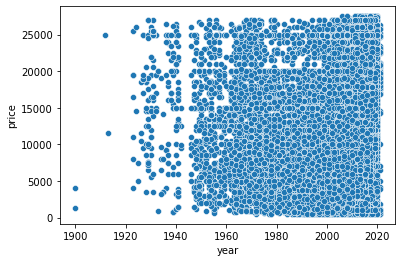

In [28]:
bx = sns.scatterplot(x="year", y="price", data=df)

* rows with year value greater than 1940 as there are less oservation with value lesser than 1940

In [29]:
df=df[(df.year > 1940)]

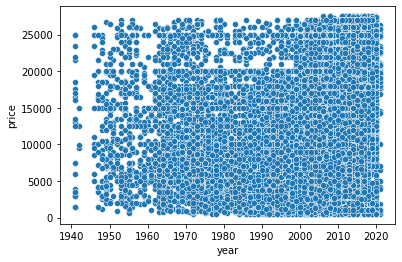

In [30]:
bx = sns.scatterplot(x="year", y="price", data=df)

# Checking for null values in the dataset

In [33]:
nan_values=df.isnull().sum()
nan_values=pd.DataFrame(null_values,columns=['NaN'])
sum_tot=len(df)
nan_values['%']=nan_values['NaN']/sum_tot
round(nan_values*100,3).sort_values('%',ascending=False)

,NaN,%
size,19161000,65.154
condition,10546900,35.863
cylinders,9602200,32.651
paint_color,7344400,24.973
drive,7337700,24.951
type,5957200,20.256
manufacturer,821200,2.792
model,223400,0.760
fuel,174000,0.592
title_status,125200,0.426


# Exploring condition column 

In [34]:
df.condition.value_counts()

excellent    84987
good         80096
like new     16399
fair          6127
new            580
salvage        432
Name: condition, dtype: int64

* We are finding missing condition value using odometer value

In [38]:
mean_excellent_odo = df[df['condition'] == 'excellent']['odometer'].mean()
mean_good_odo = df[df['condition'] == 'good']['odometer'].mean()
mean_like_new_odo = df[df['condition'] == 'like new']['odometer'].mean()
mean_salvage_odo = df[df['condition'] == 'salvage']['odometer'].mean()
mean_fair_odo = df[df['condition'] == 'fair']['odometer'].mean()

In [39]:
print('Like new average odometer:', round( mean_like_new_odo,2))
print('Excellent average odometer:', round( mean_excellent_odo,2))
print('Good average odometer:', round( mean_good_odo,2))
print('Fair average odometer:', round( mean_fair_odo,2))
print('Salvage average odometer:', round( mean_salvage_odo,2))

Like new average odometer: 86556.94
Excellent average odometer: 111001.51
Good average odometer: 109792.82
Fair average odometer: 182120.66
Salvage average odometer: 168978.58


In [40]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

In [41]:
df.loc[df['odometer'] <= mean_like_new_odo, 'condition'] = df.loc[df['odometer'] <= mean_like_new_odo, 'condition'].fillna('like new')

df.loc[df['odometer'] >= mean_fair_odo, 'condition'] = df.loc[df['odometer'] >= mean_fair_odo, 'condition'].fillna('fair')

df.loc[((df['odometer'] > mean_good_odo) & 
       (df['odometer'] <= mean_excellent_odo)), 'condition'] = df.loc[((df['odometer'] > mean_good_odo) & 
       (df['odometer'] <= mean_excellent_odo)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > mean_like_new_odo) & 
       (df['odometer'] <= mean_good_odo)), 'condition'] = df.loc[((df['odometer'] > mean_like_new_odo) & 
       (df['odometer'] <= mean_good_odo)), 'condition'].fillna('good')

df.loc[((df['odometer'] > mean_good_odo) & 
       (df['odometer'] <= mean_fair_odo)), 'condition'] = df.loc[((df['odometer'] > mean_good_odo) & 
       (df['odometer'] <= mean_fair_odo)), 'condition'].fillna('salvage')

In [45]:
nan_values=df.isnull().sum()
nan_values=pd.DataFrame(nan_values,columns=['NaN'])
j=1
sum_tot=len(df)
nan_values['%']=nan_values['NaN']/sum_tot
round(nan_values*100,3).sort_values('%',ascending=False)

,NaN,%
size,19161000,65.154
cylinders,9602200,32.651
paint_color,7344400,24.973
drive,7337700,24.951
type,5957200,20.256
manufacturer,821200,2.792
model,223400,0.760
fuel,174000,0.592
title_status,125200,0.426
transmission,117100,0.398


* Dropping nan values of the 'title_status','fuel','transmission','model','manufacturer' columns

In [46]:
df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])

In [47]:
df=df.drop(["size"],axis=1)

In [48]:
nan_values=df.isnull().sum()
nan_values=pd.DataFrame(nan_values,columns=['NaN'])
j=1
sum_tot=len(df)
nan_values['%']=nan_values['NaN']/sum_tot
round(nan_values*100,3).sort_values('%',ascending=False)

,NaN,%
cylinders,8998100,32.118
paint_color,6920200,24.701
drive,6885300,24.577
type,5576500,19.905
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


# Filling nan values of paint_color, drive, type, cylinders columns using forward fill

In [49]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')

In [50]:
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')

In [51]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     1
state           0
dtype: int64

In [52]:
df=df.dropna(subset=['cylinders','drive'])

In [53]:
from scipy import stats

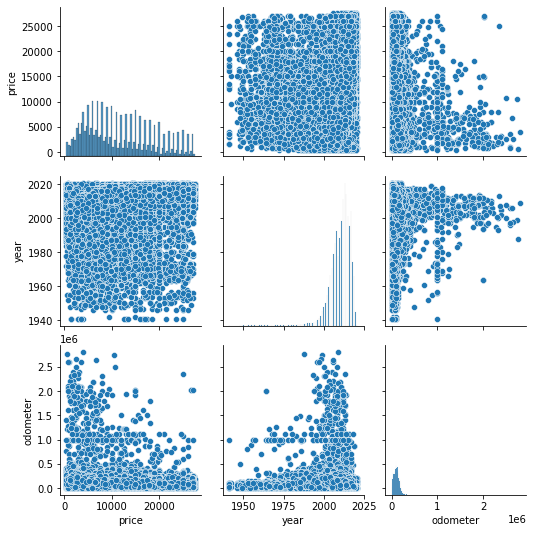

In [54]:
sns.pairplot(df, palette='pastel')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280154 entries, 1 to 458211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         280154 non-null  int64  
 1   year          280154 non-null  float64
 2   manufacturer  280154 non-null  object 
 3   model         280154 non-null  object 
 4   condition     280154 non-null  object 
 5   cylinders     280154 non-null  object 
 6   fuel          280154 non-null  object 
 7   odometer      280154 non-null  float64
 8   title_status  280154 non-null  object 
 9   transmission  280154 non-null  object 
 10  drive         280154 non-null  object 
 11  type          280154 non-null  object 
 12  paint_color   280153 non-null  object 
 13  state         280154 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 32.1+ MB


# Heatmap

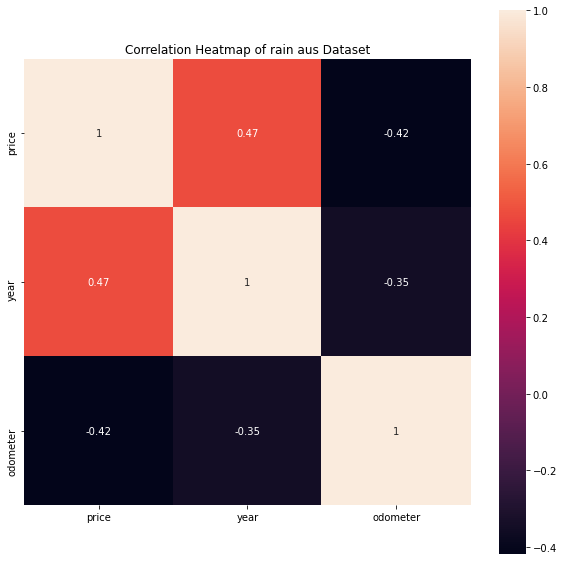

In [56]:
cor = df._get_numeric_data().corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap of rain aus Dataset')
sns.heatmap(cor, annot=True, square=True, linecolor='black')
plt.show()

# Histogram 

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

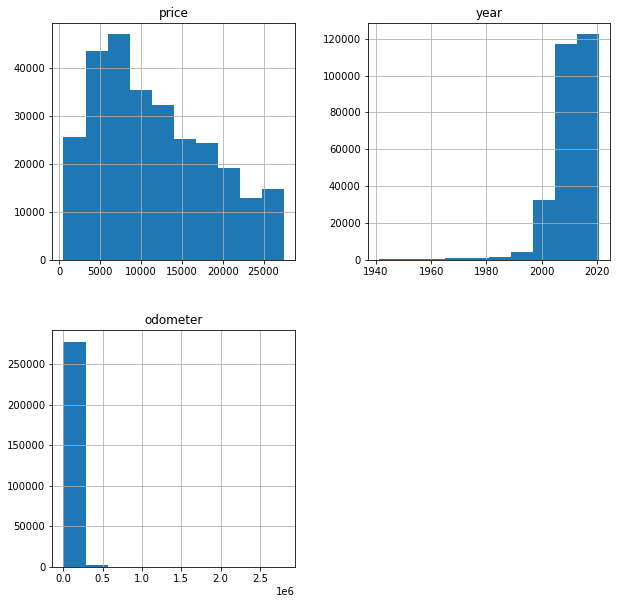

In [57]:
df._get_numeric_data().hist(figsize=(10,10))

In [58]:
c=df.columns
for i in c:
    print(df[i].value_counts())

6995     3541
5995     3303
7995     3288
9995     3167
8995     3052
         ... 
20391       1
3919        1
16455       1
8523        1
6141        1
Name: price, Length: 10348, dtype: int64
2013.0    24073
2014.0    22236
2012.0    21432
2017.0    19282
2015.0    18577
          ...  
1952.0       13
1951.0       11
1947.0        9
1946.0        8
1942.0        2
Name: year, Length: 78, dtype: int64
ford               45894
chevrolet          37969
toyota             25278
honda              19738
nissan             17379
jeep               12340
dodge              10399
gmc                 8706
hyundai             8597
volkswagen          8576
subaru              8380
bmw                 8191
ram                 6590
mercedes-benz       6582
kia                 6516
chrysler            5698
lexus               4810
mazda               4778
buick               4613
cadillac            4269
audi                3613
acura               3032
infiniti            2641
lincoln          

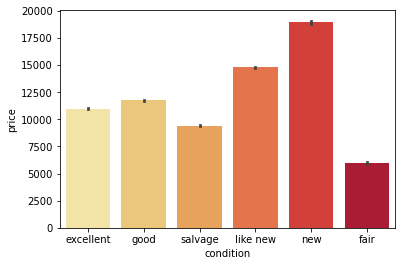

In [59]:
ax = sns.barplot(x="condition", y="price", palette="YlOrRd", data=df)

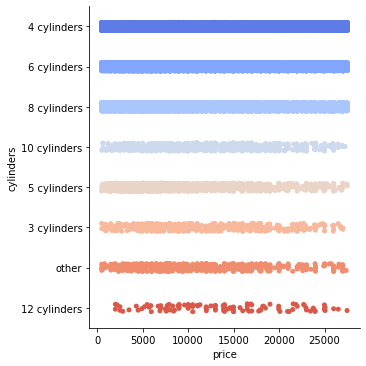

In [60]:
sns.catplot(y="cylinders", x="price",palette="coolwarm", data=df)

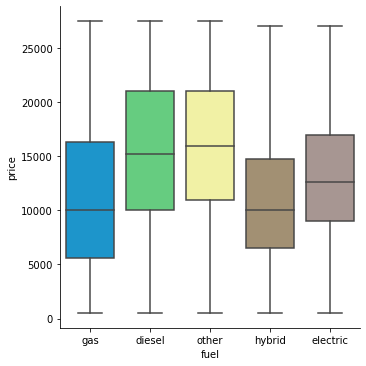

In [61]:
sns.catplot(x="fuel", y="price", kind='box',palette='terrain',
            data=df)

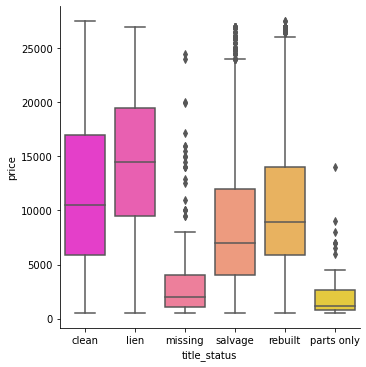

In [62]:
sns.catplot(x="title_status", y="price",kind="box",palette='spring', data=df)

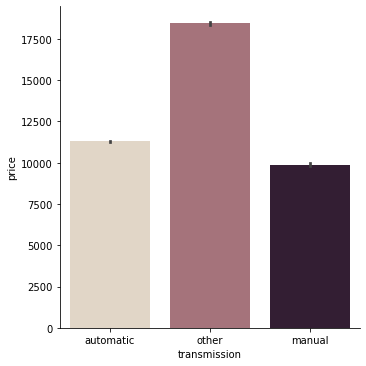

In [63]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)

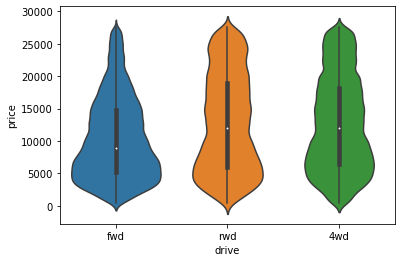

In [64]:
sns.violinplot(x=df.drive, y=df.price);

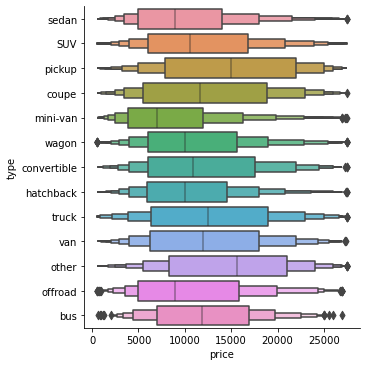

In [65]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

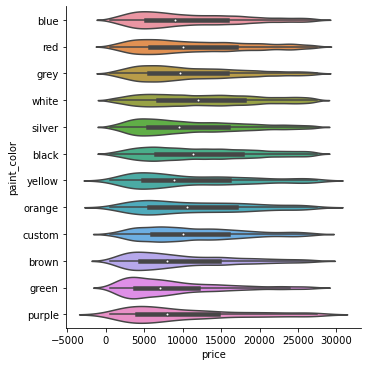

In [66]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);

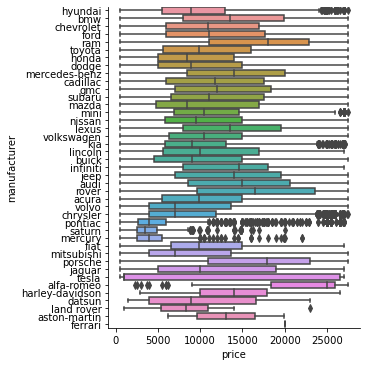

In [67]:
sns.catplot(y="manufacturer", x="price",kind="box", data=df);

In [68]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [69]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280154 entries, 1 to 458211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         280154 non-null  int64  
 1   year          280154 non-null  float64
 2   manufacturer  280154 non-null  object 
 3   model         280154 non-null  object 
 4   condition     280154 non-null  object 
 5   cylinders     280154 non-null  object 
 6   fuel          280154 non-null  object 
 7   odometer      280154 non-null  float64
 8   title_status  280154 non-null  object 
 9   transmission  280154 non-null  object 
 10  drive         280154 non-null  object 
 11  type          280154 non-null  object 
 12  paint_color   280153 non-null  object 
 13  state         280154 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 40.1+ MB


In [71]:
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].astype(str).apply(le.fit_transform)

In [72]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [73]:
y= df.price
X= df.drop('price',axis=1)

In [74]:
X

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
1,2014.0,17,14952,0,3,2,93600.0,0,0,1,9,6,1
2,2006.0,4,17260,2,5,2,87046.0,0,0,1,0,1,1
3,1974.0,7,3285,2,3,2,190000.0,0,0,2,8,1,1
4,2005.0,13,7985,0,6,0,116000.0,1,0,0,8,1,1
12,2016.0,33,134,2,5,4,57926.0,0,2,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458207,2017.0,3,1919,2,3,2,101270.0,0,0,1,0,1,48
458208,2014.0,6,15329,0,5,2,83790.0,0,0,0,0,10,48
458209,2018.0,17,16519,0,3,2,31888.0,0,0,0,0,11,48
458210,2014.0,6,5217,0,5,2,53000.0,0,0,0,3,0,50


### Splitting data 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(224123, 13) (224123,)
(56031, 13) (56031,)


# Randomforest 

In [77]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [78]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [79]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_train, regressor.predict(X_train)),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_train, regressor.predict(X_train)),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))),2))
print(regressor.score(X_train,y_train)*100)
print(metrics.r2_score(y_train, regressor.predict(X_train))*100)

Mean Absolute Error: 658.92
Mean Squared Error: 1244810.38
Root Mean Squared Error: 1115.71
97.43134880177881
97.43134880177881


In [80]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)
print(metrics.r2_score(y_test, y_pred)*100)

Mean Absolute Error: 1691.08
Mean Squared Error: 7802950.4
Root Mean Squared Error: 2793.38
83.97835149226177
83.97835149226177


C:\Users\sachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


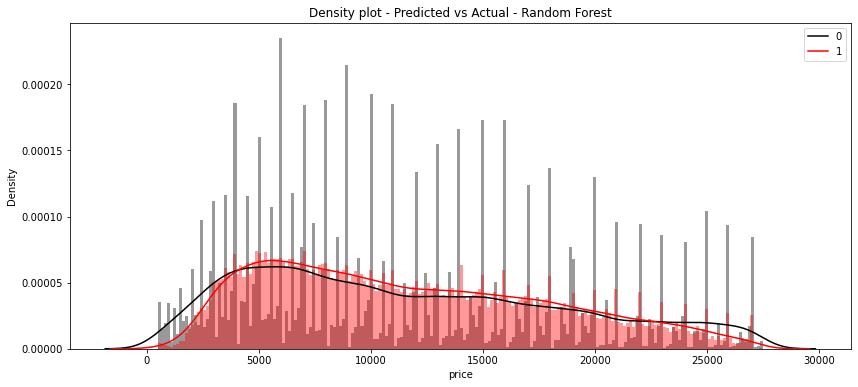

In [81]:
plt.figure(figsize = (14,6))
plt.title('Density plot - Predicted vs Actual - Random Forest')
sns.set_color_codes("pastel")
sns.distplot(y_test,kde=True,bins=200, color="black")
sns.distplot(y_pred,kde=True,bins=200, color="red")
plt.legend(['0','1'])
plt.show()

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


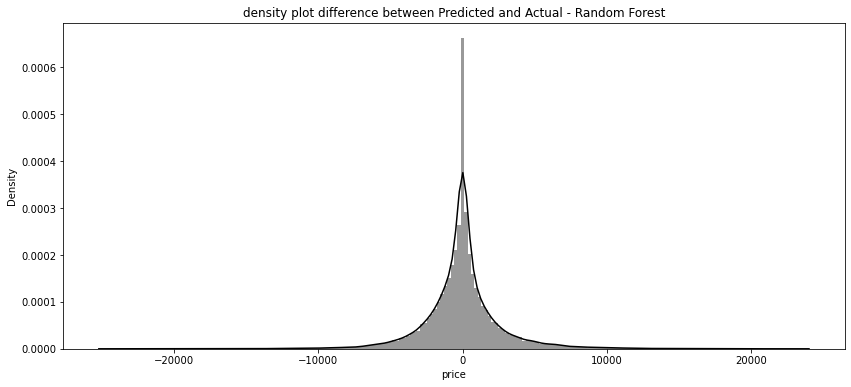

In [82]:
plt.figure(figsize = (14,6))
plt.title('density plot difference between Predicted and Actual - Random Forest')
sns.set_color_codes("pastel")
sns.distplot(y_test - y_pred,kde=True,bins=200, color="black")
plt.show()

### Linear regreesion

In [83]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [84]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))
print(lr.score(X_test,y_test)*100)
print(metrics.r2_score(y_test, pred)*100)

Mean Absolute Error: 4259.97
Mean Squared Error: 30177961.95
Root Mean Squared Error: 5493.45
38.036169106336615
38.036169106336615


### Rige Regression

In [85]:
from sklearn.linear_model import Ridge
lr_ridge = Ridge(alpha = 0.001)
lr_ridge.fit(X_train, y_train)
pred = lr_ridge.predict(X_test)

In [86]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))
print(lr_ridge.score(X_test,y_test)*100)
print(metrics.r2_score(y_test, pred)*100)

Mean Absolute Error: 4259.97
Mean Squared Error: 30177961.95
Root Mean Squared Error: 5493.45
38.036169104565076
38.036169104565076


### Lasso Regression

In [87]:
from sklearn.linear_model import Lasso
lr_ls = Lasso(alpha = 01.0)
lr_ls.fit(X_train, y_train)
pred = lr_ls.predict(X_test)

In [88]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))
print(lr_ls.score(X_test,y_test)*100)
print(metrics.r2_score(y_test, pred)*100)

Mean Absolute Error: 4260.19
Mean Squared Error: 7802950.4
Root Mean Squared Error: 5493.47
38.03557285308319
38.03557285308319


### Elastic Net regression

In [89]:
from sklearn.linear_model import ElasticNet
lr_el = ElasticNet(alpha = 1.0, l1_ratio=0.3)
lr_el.fit(X_train, y_train)
pred = lr_ls.predict(X_test)

In [90]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))
print(lr_el.score(X_test,y_test)*100)
print(metrics.r2_score(y_test, pred)*100)

Mean Absolute Error: 4260.19
Mean Squared Error: 30178252.34
Root Mean Squared Error: 5493.47
36.06865792152948
38.03557285308319


### Adaboosting

In [91]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_clf = AdaBoostRegressor(n_estimators=800, random_state=None, learning_rate=1.0)
adaboost_clf.fit(X_train, y_train)
ada_pred = adaboost_clf.predict(X_test)

In [92]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, ada_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, ada_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, ada_pred)),2))
print(adaboost_clf.score(X_test,y_test)*100)
print(metrics.r2_score(y_test, ada_pred)*100)

Mean Absolute Error: 4188.5
Mean Squared Error: 26170882.14
Root Mean Squared Error: 5115.75
46.26382928016005
46.26382928016005


### Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
grad_clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=1.1, random_state=0)
grad_clf.fit(X_train, y_train)
grad_pred = grad_clf.predict(X_test)

In [94]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, grad_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, grad_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, grad_pred)),2))
print(grad_clf.score(X_test,y_test)*100)
print(metrics.r2_score(grad_pred,y_test)*100)

Mean Absolute Error: 1807.22
Mean Squared Error: 7660861.8
Root Mean Squared Error: 2767.83
84.27009928556556
82.31048777998372


In [95]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_train, grad_clf.predict(X_train)),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_train, grad_clf.predict(X_train)),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_train, grad_clf.predict(X_train))),2))
print(grad_clf.score(X_train,y_train)*100)
print(metrics.r2_score(y_train, grad_clf.predict(X_train))*100)

Mean Absolute Error: 1643.6
Mean Squared Error: 5756197.46
Root Mean Squared Error: 2399.21
88.1221560113375
88.1221560113375


C:\Users\sachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


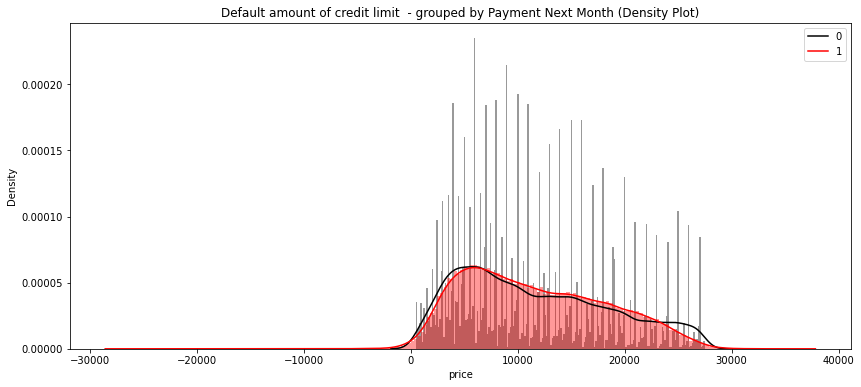

In [96]:
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(y_test,kde=True,bins=200, color="black")
sns.distplot(grad_pred,kde=True,bins=200, color="red")
plt.legend(['0','1'])
plt.show()

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


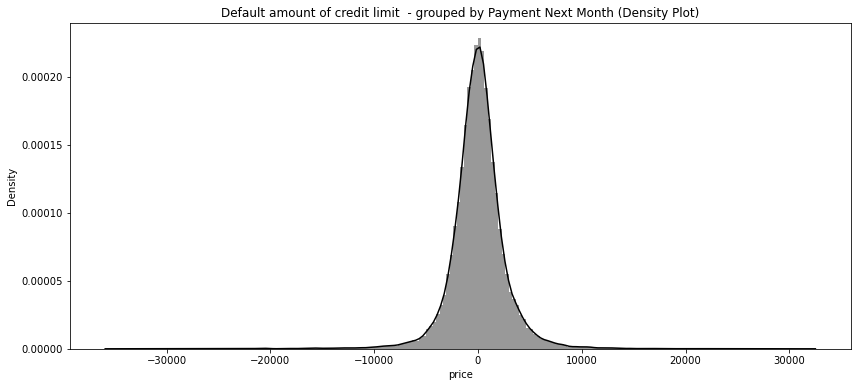

In [97]:
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(y_test - grad_pred,kde=True,bins=200, color="black")
plt.show()

In [98]:
results_table = pd.DataFrame({'RandomForest': [round(metrics.mean_absolute_error(y_test, regressor.predict(X_test)),2),  round(metrics.mean_squared_error(y_test, regressor.predict(X_test)),2), round(np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(X_test))),2), metrics.r2_score(y_test, regressor.predict(X_test))*100], 'LinearRegression':[round(metrics.mean_absolute_error(y_test, lr.predict(X_test)),2),  round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2), round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))),2), metrics.r2_score(y_test, lr.predict(X_test))*100], 'Ridge Regression': [round(metrics.mean_absolute_error(y_test, lr_ridge.predict(X_test)),2),  round(metrics.mean_squared_error(y_test, lr_ridge.predict(X_test)),2), round(np.sqrt(metrics.mean_squared_error(y_test, lr_ridge.predict(X_test))),2), metrics.r2_score(y_test, lr_ridge.predict(X_test))*100], 'Lasso Regression':[round(metrics.mean_absolute_error(y_test, lr_ls.predict(X_test)),2),  round(metrics.mean_squared_error(y_test, lr_ls.predict(X_test)),2), round(np.sqrt(metrics.mean_squared_error(y_test, lr_ls.predict(X_test))),2), metrics.r2_score(y_test, lr_ls.predict(X_test))*100], 'ElasticNet':[round(metrics.mean_absolute_error(y_test, lr_el.predict(X_test)),2),  round(metrics.mean_squared_error(y_test, lr_el.predict(X_test)),2), round(np.sqrt(metrics.mean_squared_error(y_test, lr_el.predict(X_test))),2), metrics.r2_score(y_test, lr_el.predict(X_test))*100], 'Gradient Boosting':[round(metrics.mean_absolute_error(y_test, grad_clf.predict(X_test)),2),  round(metrics.mean_squared_error(y_test, grad_clf.predict(X_test)),2), round(np.sqrt(metrics.mean_squared_error(y_test, grad_clf.predict(X_test))),2), metrics.r2_score(y_test, grad_clf.predict(X_test))*100], 'Ada Boosting':[round(metrics.mean_absolute_error(y_test, lr.predict(X_test)),2),  round(metrics.mean_squared_error(y_test, adaboost_clf.predict(X_test)),2), round(np.sqrt(metrics.mean_squared_error(y_test, adaboost_clf.predict(X_test))),2), metrics.r2_score(y_test, adaboost_clf.predict(X_test))*100]})
results_table.index = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean squared error', 'R squared error']
results_table

,RandomForest,LinearRegression,Ridge Regression,Lasso Regression,ElasticNet,Gradient Boosting,Ada Boosting
Mean Absolute Error,1.691080e+03,4.259970e+03,4.259970e+03,4.260190e+03,4.385740e+03,1.807220e+03,4.259970e+03
Mean Squared Error,7.802950e+06,3.017796e+07,3.017796e+07,3.017825e+07,3.113619e+07,7.660862e+06,2.617088e+07
Root Mean squared error,2.793380e+03,5.493450e+03,5.493450e+03,5.493470e+03,5.579980e+03,2.767830e+03,5.115750e+03
R squared error,8.397835e+01,3.803617e+01,3.803617e+01,3.803557e+01,3.606866e+01,8.427010e+01,4.626383e+01


<AxesSubplot:>

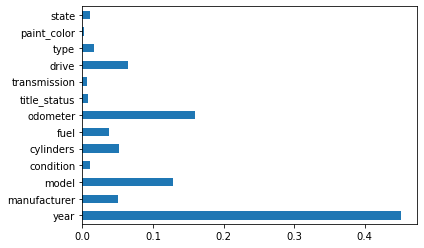

In [99]:
feat_importances = pd.Series(grad_clf.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh')

# Cross score validation of models:


### RandomForest Regressor

In [100]:
from sklearn.model_selection import cross_val_score
import statistics
res = cross_val_score(regressor, X_train, y_train, cv=10)
print('Train - Mean: {}, SD: {}'.format(sum(res)/len(res), statistics.stdev(res)))

Train - Mean: 0.8378757423781165, SD: 0.004423827616090108


In [101]:
res = cross_val_score(regressor, X_test, y_test, cv=10)
print('Test - Mean: {}, SD: {}'.format(sum(res)/len(res), statistics.stdev(res)))

Test - Mean: 0.7615487519310331, SD: 0.007614167868040831


### Gradient Boost regressor

In [103]:
res_grad_train = cross_val_score(grad_clf, X_train, y_train, cv=10)
print('Train - Mean: {}, SD: {}'.format(sum(res_grad_train)/len(res_grad_train), statistics.stdev(res_grad_train)))

Train - Mean: 0.8395883820999016, SD: 0.005553018786358553


In [104]:
res_grad_test = cross_val_score(grad_clf, X_test, y_test, cv=10)
print('Train - Mean: {}, SD: {}'.format(sum(res_grad_test)/len(res_grad_test), statistics.stdev(res_grad_test)))

Train - Mean: 0.784049345075138, SD: 0.008237911787926147


In [105]:
tab = pd.DataFrame({'Mean':[sum(res_grad_train)/len(res_grad_train), sum(res_grad_test)/len(res_grad_test) ], 'Standard Deviation':[statistics.stdev(res_grad_train), statistics.stdev(res_grad_test)]})
tab.index = ['Train', 'Test']
tab

,Mean,Standard Deviation
Train,0.839588,0.005553
Test,0.784049,0.008238
